# **DATA MODELLING**

## Objectives

* To identify clinical indicator that signify presence of an Mpox infection through logistic regression as an inferential statistic as well as machine learning algorithm in a pipeline.

## Inputs

* Cleaned Mpox dataset
* Encoded Mpox data
* Libraries like pandas, numPy, matplotlib, seaborn, plotly, statsmodels and scikit learn

## Outputs

* Statistical test results
* Machine learning model


---

# Change working directory

Changing the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\zzama\\OneDrive\\Documents\\Data Analytics with AI Course\\Capstone Project\\Risk-Factors-for-MonkeyPox-Infection\\jupyter_notebooks'

Making the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\zzama\\OneDrive\\Documents\\Data Analytics with AI Course\\Capstone Project\\Risk-Factors-for-MonkeyPox-Infection'

# Section 1: Import libraries and load cleaned dataset

Import libraries

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") 

Load cleaned dataset

---

In [7]:
# Load encoded dataset for data analysis and modeling
df = pd.read_csv("Dataset/Mpox_Encoded2.csv")

df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,0,0,1,1,1,0,1,0,0,0
1,1,1,0,1,1,0,0,1,0,1
2,1,0,1,1,0,0,0,1,0,1
3,0,1,0,0,0,1,1,1,0,1
4,2,1,1,1,0,0,1,1,0,1


# Section 2: Inferential statistics

* Explo
* To get a better understanding of the data in individual variables, including distribution or frequencies

Mpox Diagnosis

* About 2/3 of the people tested had Mpox
* Test positivity rate was 63.6 percent

Systemic Illness
* About 75 percent of the people tested had at least one systemic illness or symptom.
* Data does not allow analysis on whether other people had more than one symptom

Other variables

* Half of the people tested hand rental pain, sore throat, penile oedema, oral lesion, solitary lession, swollen tonsils, HIV infection and sexually transmitted infections while the other half did not.

* The summary provides coefficients, p-values, and other statistics for each feature in the model 
* This helps identify significant risk factors for MonkeyPox infection
* Further modeling and evaluation can be done as needed

In [9]:
# Fit logistic regression model using statsmodels to get detailed summary
X = df.drop('MonkeyPox', axis=1) 
y = df['MonkeyPox']
X = sm.add_constant(X)  # Adds a constant term to the predictors
logit_model = sm.Logit(y, X) 
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.620314
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              MonkeyPox   No. Observations:                25000
Model:                          Logit   Df Residuals:                    24990
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                 0.05365
Time:                        00:42:58   Log-Likelihood:                -15508.
converged:                       True   LL-Null:                       -16387.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7694      0.045    -17.253     

In [10]:
# compute odds ratios and confidence intervals for the coefficients
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

# Identify significant features based on p-values
significant_features = result.pvalues[result.pvalues < 0.05].index.tolist() 
print("Significant features based on p-values:", significant_features)

                                    2.5%     97.5%        OR
const                           0.424509  0.505600  0.463284
Systemic Illness                0.953403  1.000262  0.976552
Rectal Pain                     1.748144  1.946376  1.844599
Sore Throat                     1.252352  1.393685  1.321130
Penile Oedema                   1.241879  1.381990  1.310063
Oral Lesions                    1.202777  1.338555  1.268851
Solitary Lesion                 1.116160  1.242032  1.177415
Swollen Tonsils                 1.012337  1.126476  1.067883
HIV Infection                   1.802630  2.006892  1.902021
Sexually Transmitted Infection  1.636758  1.822137  1.726962
Significant features based on p-values: ['const', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']


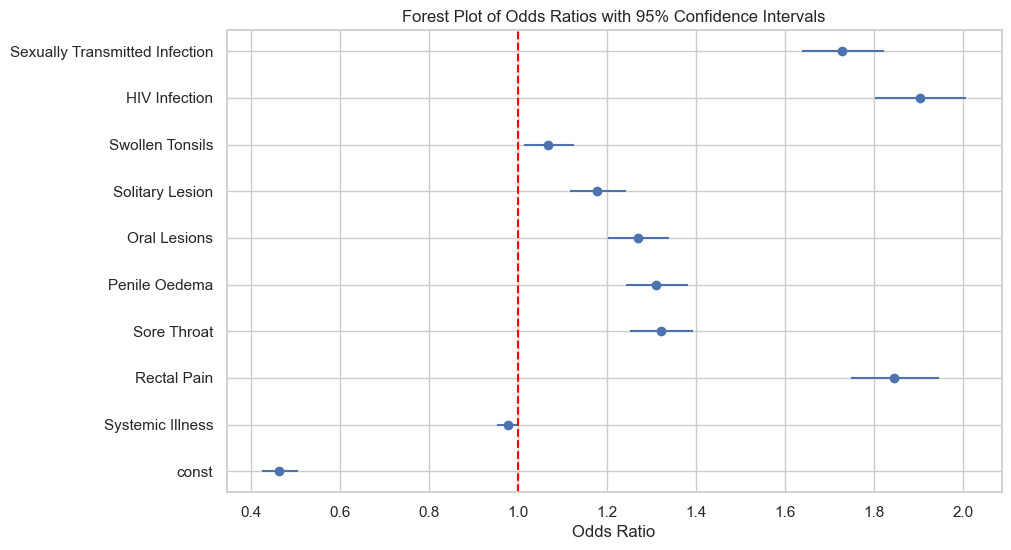

In [11]:
# Plots for visualizing odds ratios on forest plot interactively using matplotlib 
odds_ratios = np.exp(result.params)
conf_int = result.conf_int()
conf_int_exp = np.exp(conf_int)
plt.figure(figsize=(10, 6))
plt.errorbar(odds_ratios, range(len(odds_ratios)),
                xerr=[odds_ratios - conf_int_exp[0], conf_int_exp[1] - odds_ratios],
                fmt='o')
plt.yticks(range(len(odds_ratios)), odds_ratios.index)
plt.axvline(x=1, color='red', linestyle='--')
plt.xlabel('Odds Ratio')
plt.title('Forest Plot of Odds Ratios with 95% Confidence Intervals')
plt.show()

# Section 2: Machine Learning Modelling - Classification

Explain a few things
* Data is already cleaned - no further featuring is needed.

Load cleaned and encoded dataset for ML Modelling

In [13]:
#Load encoded and cleaned dataset for data analysis and modeling
df = pd.read_csv("Dataset/Mpox_Encoded2.csv")
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,0,0,1,1,1,0,1,0,0,0
1,1,1,0,1,1,0,0,1,0,1
2,1,0,1,1,0,0,0,1,0,1
3,0,1,0,0,0,1,1,1,0,1
4,2,1,1,1,0,0,1,1,0,1


We split the data into train and test sets.

In [ ]:
# Split the dataset into training and testing sets for model evaluation
X_train, X_test,y_train, y_test = train_test_split(
                                    df.drop(['MonkeyPox'],axis=1),
                                    df['MonkeyPox'],
                                    test_size=0.2,
                                    random_state=2025
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (20000, 9) (20000,) 
* Test set: (5000, 9) (5000,)


Creating pipeline with the following step:
* Feature scaling
* Feature selection
* Modelling (Random Forest Classifier) - when feature importance i

In [24]:
# Define FUNCTION Pipeline with StandardScaler and RandomForestClassifier

def Mpox_pipeline():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feat selection', SelectFromModel(RandomForestClassifier(random_state=2025))),
        ('model', RandomForestClassifier(random_state=2025))
    ])
    return pipeline

We define the object pipeline based on Mpox_pipeline(), then fit to the train set (X_train and y_train)

In [25]:
# fit the pipeline to the training data
pipeline = Mpox_pipeline()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=2025))),
                ('model', RandomForestClassifier(random_state=2025))])

In [33]:
def confusion_matrix_and_report(X,y,pipeline,label_map):

  prediction = pipeline.predict(X)

  print('---  Confusion Matrix  ---')
  print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
        columns=[ ["Actual " + sub for sub in label_map] ], 
        index= [ ["Prediction " + sub for sub in label_map ]]
        ))
  print("\n")


  print('---  Classification Report  ---')
  print(classification_report(y, prediction, target_names=label_map),"\n")


def Mpox_performance(X_train,y_train,X_test,y_test,pipeline,label_map):
  print("#### Train Set #### \n")
  confusion_matrix_and_report(X_train,y_train,pipeline,label_map)

  print("#### Test Set ####\n")
  confusion_matrix_and_report(X_test,y_test,pipeline,label_map)

In [34]:
Mpox_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map= ['Negative', 'Positive'] 
                )

#### Train Set #### 

---  Confusion Matrix  ---
                    Actual Negative Actual Positive
Prediction Negative            2781            2140
Prediction Positive            4522           10557


---  Classification Report  ---
              precision    recall  f1-score   support

    Negative       0.57      0.38      0.46      7303
    Positive       0.70      0.83      0.76     12697

    accuracy                           0.67     20000
   macro avg       0.63      0.61      0.61     20000
weighted avg       0.65      0.67      0.65     20000
 

#### Test Set ####

---  Confusion Matrix  ---
                    Actual Negative Actual Positive
Prediction Negative             656             579
Prediction Positive            1132            2633


---  Classification Report  ---
              precision    recall  f1-score   support

    Negative       0.53      0.37      0.43      1788
    Positive       0.70      0.82      0.75      3212

    accuracy                   

# Conclusion and next steps

* To EDA has addressed the question about the test positivty rate for Mpox, which is 63.6 percent
* There is also an indication that most of the clinical features are not significantly associated Mpox diagnosis
* Next step is data modelling - notebook 3